## Here we look how well our models perform on a different dataset and vice-versa

In [26]:
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import pandas as pd

from matplotlib import rc
model_folder = "../Cross-Evaluation-Results/"

#!pip3 install latex


## Cross-Evaluation on RP-Mod

AUC:0.696551539505877
AUC:0.7936917830098955
AUC:0.5614432005459601


Text(0, 0.5, 'TPR')

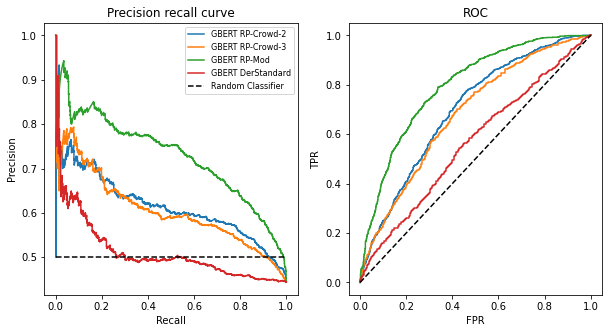

In [31]:
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Mod.pickle", "rb" ) )
mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Mod.pickle", "rb" ) )
min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Mod.pickle", "rb" ) )
min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Mod.pickle", "rb" ) )


fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,5))

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min2["y_trues"],probs_min2)
ax1.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min3["y_trues"],probs_min3)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(mod["y_trues"],probs_mod)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard["y_trues"],probs_derstandard)
ax1.plot(lr_recall, lr_precision, label='Bla')
k  = ax1.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")


## auc

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

print("AUC:" + str(metrics.auc(fpr, tpr)))


ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

# if latex is intalled use this
#ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
# else use this
ax1.legend(["GBERT RP-Crowd-2","GBERT RP-Crowd-3","GBERT RP-Mod","GBERT DerStandard","Random Classifier"],fontsize=8)

ax1.set_title("Precision recall curve")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


ax2.set_title("ROC")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')


## Cross-Evaluation in RP-Crowd-2

AUC:0.8688137207087949
AUC:0.7245136518110808
AUC:0.6683852388583107


Text(0, 0.5, 'TPR')

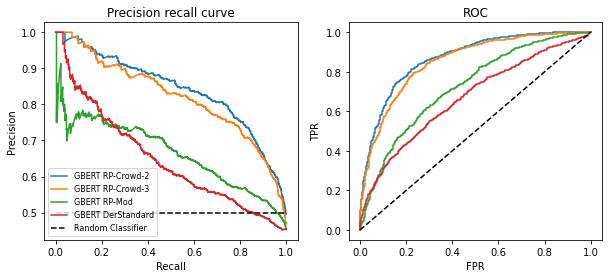

In [33]:
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,4))

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min2["y_trues"],probs_min2)
ax1.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min3["y_trues"],probs_min3)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(mod["y_trues"],probs_mod)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard["y_trues"],probs_derstandard)
ax1.plot(lr_recall, lr_precision, label='Bla')

ax1.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")

## AUC

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

print("AUC:" + str(metrics.auc(fpr, tpr)))


ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

# if latex is intalled use this
#ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
# else use this
ax1.legend(["GBERT RP-Crowd-2","GBERT RP-Crowd-3","GBERT RP-Mod","GBERT DerStandard","Random Classifier"],fontsize=8)

ax1.set_title("Precision recall curve")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


ax2.set_title("ROC")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')



AUC:0.941457741018351
AUC:0.7756526234169037
AUC_standard:0.6995347635047816


Text(0, 0.5, 'TPR')

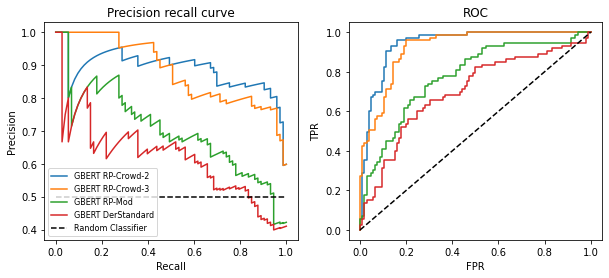

In [36]:
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )

min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )

min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,4))

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min2["y_trues"],probs_min2)
ax1.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min3["y_trues"],probs_min3)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(mod["y_trues"],probs_mod)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard["y_trues"],probs_derstandard)
ax1.plot(lr_recall, lr_precision, label='Bla')

ax1.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")

## AUC

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

print("AUC_standard:" + str(metrics.auc(fpr, tpr)))


ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

# if latex is intalled use this
#ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
# else use this
ax1.legend(["GBERT RP-Crowd-2","GBERT RP-Crowd-3","GBERT RP-Mod","GBERT DerStandard","Random Classifier"],fontsize=8)

ax1.set_title("Precision recall curve")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


ax2.set_title("ROC")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')



AUC:0.6475921521997622
AUC:0.644396551724138
AUC:0.6319114149821643
AUC:0.7852259215219977


Text(0, 0.5, 'TPR')

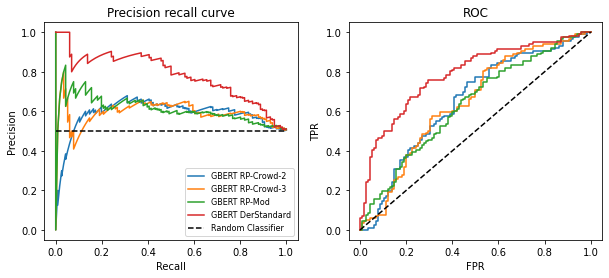

In [38]:
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_DerStandard.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_DerStandard.pickle", "rb" ) )

min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_DerStandard.pickle", "rb" ) )

min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_DerStandard.pickle", "rb" ) )


fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,4))

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

## precision recall
lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min2["y_trues"],probs_min2)
ax1.plot(lr_recall, lr_precision, label='Bla')

lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(min3["y_trues"],probs_min3)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(mod["y_trues"],probs_mod)
ax1.plot(lr_recall, lr_precision, label='Bla')


lr_precision, lr_recall, _ = sklearn.metrics.precision_recall_curve(derstandard["y_trues"],probs_derstandard)
ax1.plot(lr_recall, lr_precision, label='Bla')
ax1.plot([0, 1], [0.5, 0.5], color='black', linestyle='--',label="Baseline")

## AUC

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

print("AUC:" + str(metrics.auc(fpr, tpr)))


ax2.plot([0, 1], [0, 1], color='black', linestyle='--')

# if latex is intalled use this
#ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
# else use this
ax1.legend(["GBERT RP-Crowd-2","GBERT RP-Crowd-3","GBERT RP-Mod","GBERT DerStandard","Random Classifier"],fontsize=8)

ax1.set_title("Precision recall curve")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


ax2.set_title("ROC")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')




## Global Cross-Evaluation

AUC:0.6475921521997622
AUC:0.644396551724138
AUC:0.6319114149821643
AUC:0.696551539505877
AUC:0.6795987338371848
AUC:0.7936917830098955
AUC:0.8688137207087949
AUC:0.8515157497077654
AUC:0.7245136518110808
AUC:0.941457741018351
AUC:0.9222021194107004
AUC:0.7756526234169037


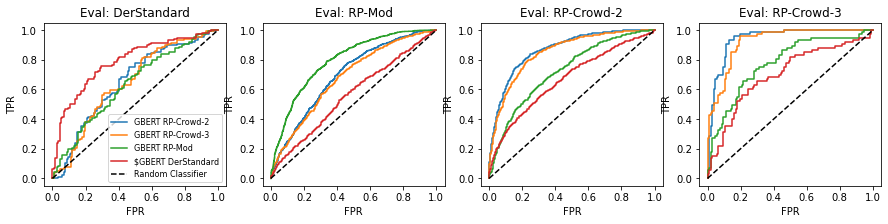

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1 ,4, figsize=(15,3))


############ DERStandard-Crosseval ############
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_DerStandard.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_DerStandard.pickle", "rb" ) )


min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_DerStandard.pickle", "rb" ) )


min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_DerStandard.pickle", "rb" ) )


#fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,4))

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax1.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax1.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax1.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax1.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

ax1.plot([0, 1], [0, 1], color='black', linestyle='--')
ax1.set_title("Eval: DerStandard")
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')

# if latex is intalled use this
#ax1.legend(["\\texttt{GBERT}$_{Base}$ RP-Crowd-2","\\texttt{GBERT}$_{Base}$ RP-Crowd-3","\\texttt{GBERT}$_{Base}$ RP-Mod","$\\texttt{GBERT}_{Base}$ DerStandard","Random Classifier"],fontsize=8)
# else use this
ax1.legend(["GBERT RP-Crowd-2","GBERT RP-Crowd-3","GBERT RP-Mod","$GBERT DerStandard","Random Classifier"],fontsize=8)

############ RP-MOD-Crosseval ############
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Mod.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Mod.pickle", "rb" ) )

min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Mod.pickle", "rb" ) )

min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Mod.pickle", "rb" ) )

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')


fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax2.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
ax2.plot([0, 1], [0, 1], color='black', linestyle='--')
ax2.set_title("Eval: RP-Mod")
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')


############ RP-Crowd-2-Crosseval ############
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )
df.to_csv("cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_derstandard.pickle.json")

min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )
df.to_csv("cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_derstandard.pickle.json")

min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Crowd-2.pickle", "rb" ) )

probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax3.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax3.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax3.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax3.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
ax3.plot([0, 1], [0, 1], color='black', linestyle='--')
ax3.set_title("Eval: RP-Crowd-2")
ax3.set_xlabel('FPR')
ax3.set_ylabel('TPR')


############ RP-Crowd-3-Crosseval ############
## load eval results
derstandard = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-derstandard-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


mod = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


min3 = pickle.load( open( model_folder + "renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


min2 = pickle.load( open( model_folder +"renewed_cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_RP-Crowd-3.pickle", "rb" ) )


probs_min3 = [x[1] for x in min3["probs"]]
probs_min2 = [x[1] for x in min2["probs"]]
probs_mod = [x[1] for x in mod["probs"]]
probs_derstandard = [x[1] for x in derstandard["probs"]]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min2["y_trues"], probs_min2)
print("AUC:" + str(metrics.auc(fpr, tpr)))
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')

fpr, tpr, thresholds = sklearn.metrics.roc_curve(min3["y_trues"], probs_min3)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(mod["y_trues"], probs_mod)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
print("AUC:" + str(metrics.auc(fpr, tpr)))

probs = [x[1] for x in derstandard["probs"]]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(derstandard["y_trues"], probs_derstandard)
ax4.plot(fpr, tpr,linestyle='-', label='AutoSklearn')
ax4.plot([0, 1], [0, 1], color='black', linestyle='--')
ax4.set_title("Eval: RP-Crowd-3")
ax4.set_xlabel('FPR')
ax4.set_ylabel('TPR')

plt.savefig("../Figures/cross_eval_all.pdf", bbox_inches='tight')